# http://bit.ly/dri17

![Titanic](figs/RMS_titanic_3.jpg)

# [Kaggle Titanic Data](https://www.kaggle.com/c/titanic/data)

VARIABLE DESCRIPTIONS
=====================
```
survival: Survival (0 = No; 1 = Yes)|
pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name: Name
sex: Sex
age: Age
```

VARIABLE DESCRIPTIONS
=====================
```
sibsp: Number of Siblings/Spouses Aboard
parch: Number of Parents/Children Aboard
ticket: Ticket Number
fare: Passenger Fare
cabin: Cabin
embarked: Port of Embarkation 
    (C = Cherbourg; Q = Queenstown; S = Southampton)
```

SPECIAL NOTES
==============
```
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5
```

Family Notes
============
```
With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```


In [1]:
import pandas as pd

df = pd.read_csv("bit.ly/tscv17")

df.head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
#What do we have, what type is it, and what's missing?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
#how do we take a statistical snapshot?
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lindblom, Miss. Augusta Charlotta",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
#but we're interested in survival, right? 1=Survived
df.groupby(['Survived']).count() #of records

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [5]:
#how do we break Survival by demographics?
by_demo = df.groupby(['Sex', 'Pclass'])
#unstack creates the table
by_demo['Survived'].count().unstack() 

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [6]:
#can we compute a survival rate?
Survival_rate = by_demo['Survived'].sum()/by_demo['Survived'].count()
Survival_rate.unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


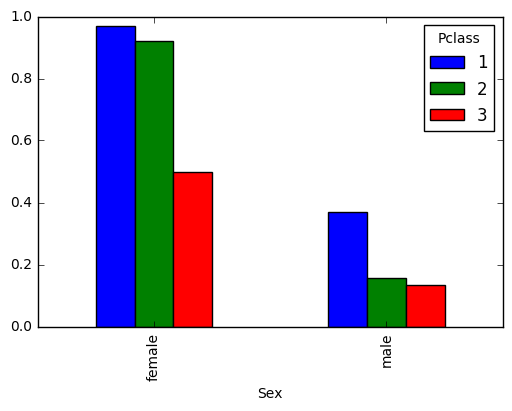

In [7]:
%matplotlib inline
Survival_rate.unstack().plot(kind='bar')

In [8]:
#What if we want something more complicated? 

df.pivot_table(index='Pclass', columns='Sex', aggfunc={'Survived':'sum', 'Fare':'mean', 'Age':'median'})

#{'key':value} is a Python data structure called a dictionary

Fare            Survived          Age      
Sex         female       male   female  male female  male
Pclass                                                   
1       106.125798  67.226127     91.0  45.0   35.0  40.0
2        21.970121  19.741782     70.0  17.0   28.0  30.0
3        16.118810  12.661633     72.0  47.0   21.5  25.0

Challenges
======
1. Is family size (Sibsp and Parch) related to survival? 
2. Is their a relationship between class, ticket cost, and port of embarkment?

# But how do we look at individual passengers?

![mult](figs/multivariate.png)

![ml](figs/ml_map.png)

# Where do we start? axis notation 
![axis](figs/axis.jpg)
source: [stackoverflow](http://stackoverflow.com/questions/25773245/ambiguity-in-pandas-dataframe-numpy-array-axis-definition)

In [9]:
# names and ticket #s are too complicated and passengerID has no meaning
# and lets drop survived since to an extent that's what we're trying to uncover
# axis = 1 means that these are columns
df_filtered = df.drop(["Name", "Ticket", "PassengerId", "Survived"], axis=1)
#Now what's missing?
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [10]:
#We're missing so much cabin data that it makes sense to drop it as a first pass
df_c = df_filtered.drop(["Cabin"], axis=1)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


How do we find the ~170 missing rows? Fancy Indexing
==========================
![masking](figs/masking.png)

modified from [software carpentry](http://v4.software-carpentry.org/matrix/indexing.html)


In [19]:
#isnull - is any cell missing a value? 
#any(axis=1) - which rows have at least 1 missing value?
bad_rows = df_c.isnull().any(axis=1)
#true = 1, false = 0, so sum() gives total # true
print(bad_rows.sum(), "missing rows")

#~ means not, so ~bad_rows => good rows
df_clean = df_c[~bad_rows]
survived = df['Survived'][~bad_rows]

#What state is our data in now?
df_clean.info()

179 missing rows
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


# How do we deal with catagories and text? One-Hot Coding
==============
![one-hot](figs/word2vec-one-hot.png)
source: [Amazing Power of Word Vectors](http://www.kdnuggets.com/2016/05/amazing-power-word-vectors.html)

In [12]:
#Let's one-hot code Pclass, Sex, & Embarked
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
df_coded = pd.get_dummies(df_clean, columns=["Pclass", "Sex", "Embarked"])
df_coded.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [13]:
# need to put continuous numerical values on same range (normalize them)

df_coded['ageN'] = (df_coded['Age']-df_coded['Age'].mean())/df_coded['Age'].std()
df_coded['FareN'] = (df_coded['Fare']-df_coded['Fare'].mean())/df_coded['Fare'].std()

#now it's a feature vector as far as our algs are concerned
dfFV = df_coded.drop(["Age", "Fare"], axis=1)
dfFV.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,ageN,FareN
0,1,0,0,0,1,0,1,0,0,1,-0.527298,-0.516017
1,1,0,1,0,0,1,0,1,0,0,0.576688,0.693558
2,0,0,0,0,1,1,0,0,0,1,-0.251301,-0.503267
3,1,0,1,0,0,1,0,0,0,1,0.369691,0.350080
4,0,0,0,0,1,0,1,0,0,1,0.369691,-0.500905


![proj](figs/proj.jpg)

In [14]:
#http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(dfFV)
df_reduced = pca.transform(dfFV.values)
pca_score = pca.explained_variance_ratio_
pca_weights = pca.components_


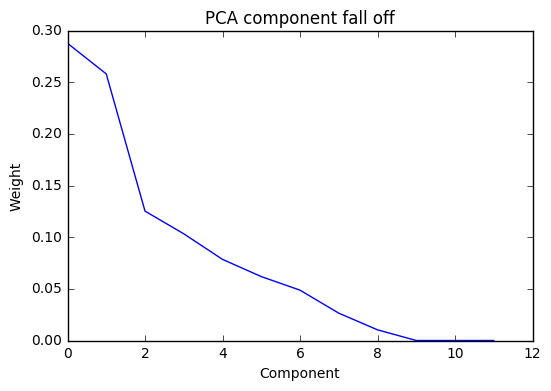

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("PCA component fall off")
ax.plot(pca_score)
ax.set_xlabel("Component")
ax.set_ylabel("Weight")

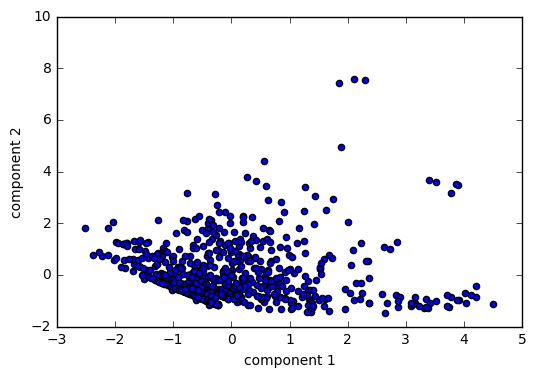

In [106]:
#lsince falls off by 3rd component, lets plot the first two

fig, ax = plt.subplots()
#grab all rows of first and second components (columns of df_reduced)
ax.scatter(df_reduced[:,0], df_reduced[:,1])
ax.set_xlabel("component 1")
ax.set_ylabel("component 2")

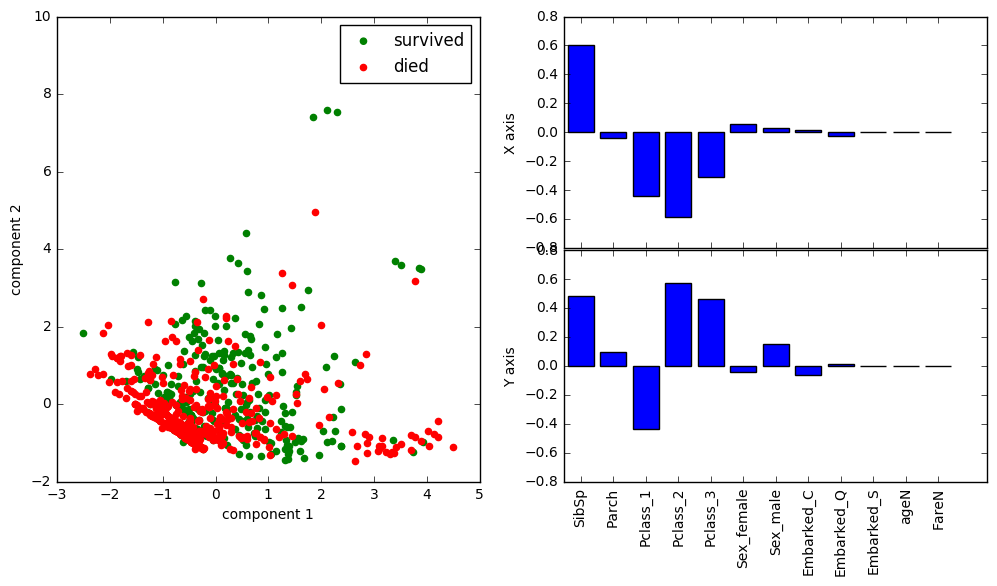

In [108]:
# lets use boolean masks to add class information:
yes = df_reduced[(survived==1).nonzero()]
no = df_reduced[(survived==0).nonzero()]

fig = plt.figure(figsize=(12,6))
#rows, #cols, position
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4)

#grab all rows of first and second components (columns of df_reduced)
ax1.scatter(yes[:,0], yes[:,1], label="survived", color="g")
ax1.scatter(no[:,0], no[:,1], label="died", color="r")                                   
ax1.set_xlabel("component 1")
ax1.set_ylabel("component 2")
ax1.legend(scatterpoints=1)

#and lets look at what determines the directionality

comp1 = pca_weights.T[0]
comp2 = pca_weights.T[1]

ax2.bar(range(comp1.shape[0]), comp1, align='center')
ax2.set_xticks(range(comp1.shape[0]))
ax2.set_xlim(-.5,12.5)
ax2.set_ylim(-.8,.8)
ax2.set_ylabel("X axis")

ax3.bar(range(comp2.shape[0]), comp2, align='center')
ax3.set_xticks(range(comp2.shape[0]))
ax3.set_xticklabels(dfFV.keys(), rotation=90)
ax3.set_xlim(-.5,12.5)
ax3.set_ylim(-.8,.8)
ax3.set_ylabel("Y axis")

fig.subplots_adjust(wspace=0.2, hspace=0.010)
fig.savefig("figs/pca_graphs.png")

![pcabar](figs/pca_graphs.png)

# So not the greatest seperation...new idea?
![kmeans](figs/kmeans.gif)
source: [Project Rhea: Introduction to Clustering](https://www.projectrhea.org/rhea/index.php/SlectureDavidRunyanCS662Spring14)

In [110]:

from sklearn import metrics
from sklearn.cluster import KMeans

kmean = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmean.fit(dfFV)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

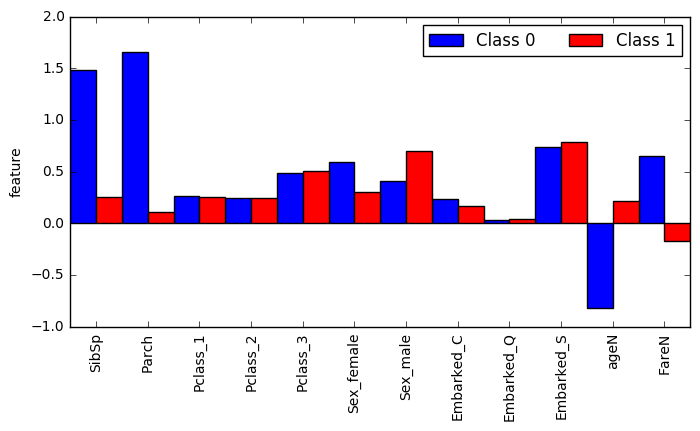

In [124]:
import numpy as np

cluster0 = kmean.cluster_centers_[0]
cluster1 = kmean.cluster_centers_[1]

inds = np.arange(kmean.cluster_centers_.shape[1])


fig, ax = plt.subplots(figsize=(8,4))
ax.bar(inds, cluster0,width=.5, align='center', label="Class 0")
ax.bar(inds+.5, cluster1, width=.5, align='center', color='r',label= "Class 1")
ax.set_xticks(inds+.25)
ax.set_xticklabels(dfFV.keys(), rotation=90)
ax.set_xlim(-.25,11.75)
ax.set_ylabel("feature")
ax.legend(ncol=2)

In [126]:
#accuracy? http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation
from sklearn import metrics

#since cluster 0 seems to be people who died 
#and cluster one seems to be people who lived
#we can directly compare actual, predicted
#raw mismatch
print("Accuracy: ", (survived== kmean.labels_).sum()/kmean.labels_.shape[0])

#[-1, 1], negative bad, 1 perfect, others?
print("Adjusted Rand: ", metrics.adjusted_rand_score(survived.values, kmean.labels_))
print("Mutual Info Gain: ", metrics.adjusted_mutual_info_score(survived.values,kmean.labels_))



Accuracy:  0.36797752809
Adjusted Rand:  0.0573540543325
Mutual Info Gain:  0.0257887728032


# What's next?

![super](figs/super.gif)
source:[Dynamic Science: Classification](http://www.dynamicscience.com.au/tester/solutions1/biology/classification/class.html)

In [127]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=10)
#fits on values used for prediction, expected class
neigh.fit(dfFV.values, survived.values) 
print(neigh.score(dfFV.values, survived.values))

0.831460674157


In [130]:
#lets save out our cleaned training set
dfFV.to_csv("titanictrainfv.csv")

In [132]:
#how do we predict the class of a value?
labels = neigh.predict(dfFV)
#confusion matrix is:
#[[True Positive, False Negative]]
#[[False Positive True Negative]]
print(metrics.confusion_matrix(labels, survived.values))

[[390  86]
 [ 34 202]]


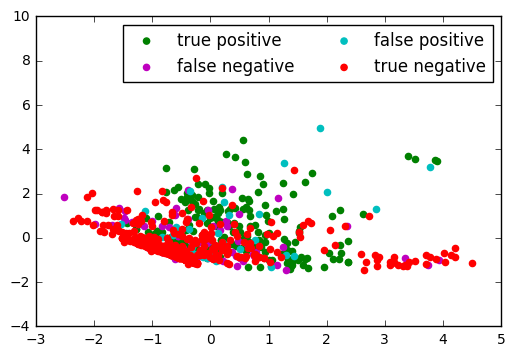

In [138]:
%matplotlib inline
actual = survived.values
TP = df_reduced[((labels == actual) & (actual==1))]
FN = df_reduced[((labels!=actual) & (actual==1))]
FP = df_reduced[((labels!=actual) & (actual==0))]
TN = df_reduced[((labels==actual) & (actual==0))]

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(TP[:,0], TP[:,1], color='g', label="true positive")
ax.scatter(FN[:,0], FN[:,1], color='m', label="false negative")
ax.scatter(FP[:,0], FP[:,1], color='c', label="false positive")
ax.scatter(TN[:,0], TN[:,1], color='r', label="true negative")
ax.legend(scatterpoints=1, ncol=2)

Challenge
==========
Test out the classifier!

1) Download or open the file [`titanictest.csv`]

2) Clean it & encode it in the same manner as `titanic.csv` as it's structured the same

3) Use the classifier to predict who survived and who didn't

4) Test your classifier using the [full training set](https://raw.githubusercontent.com/GCDigitalFellows/gcdri_ts_cat_ml/master/data/titanicfull.csv)

5) Evaluate the skill of the classifier at [https://www.kaggle.com/c/titanic/submissions/attach)